In [33]:
import numpy as np
import matplotlib.pyplot as plt


# Orthogonal Projection


In [45]:
def orthogonal_projection(x):
  projection = np.array([0]*3)
  projection[0] = max(-1, x[0])
  projection[1] = max(-2, x[1])
  projection[2] = max(-3, x[2])
  return projection

#Gradient Projection Method

In [46]:
global a,b,c,d,e,f,g
a = b = c = 1
d = e = f = 0
g = -2
def func(x):
  return a * (x[0] ** 2) + b * (x[1] ** 2) + c * (x[2] ** 2) + d * x[0] * x[1] + e * x[0] * x[2] + f * x[1] * x[2] + g * x[0] * x[1] * x[2]
def gradient(x):
  result = np.array([0]*3)
  result[0] = 2 * a * x[0] + d * x[1] + e * x[2] + g * x[1] * x[2]
  result[1] = 2 * b * x[1] + d * x[0] + f * x[2] + g * x[0] * x[2]
  result[2] = 2 * c * x[2] + e * x[0] + f * x[1] + g * x[0] * x[1]
  return result

In [51]:
def gradient_projection(epsilon, current_point, step_size):
  next_point = orthogonal_projection(current_point - step_size * gradient(current_point))
  number_of_iterations = 1
  while np.linalg.norm(next_point-current_point) > epsilon:
          current_point = next_point
          next_point = orthogonal_projection(current_point - step_size * gradient(current_point))
          number_of_iterations += 1
  return func(next_point), next_point, number_of_iterations

#Testing the algorithm

In [52]:
current_point = np.array([-2,-1,-1])
step_size = 0.1
epsilon = 10**(-5)
result = gradient_projection(epsilon, current_point, step_size)
print("Number of Iterations: ", result[2])
print("Optimal Point: ", result[1])
print("Optimal Value: ", result[0])

Number of Iterations:  3
Optimal Point:  [0 0 0]
Optimal Value:  0


#Investigating the impact of step size
The minimum number of iterations observed is 2. With a slight increase in the step size from 1e-25, the number of iterations rises to 3 and stabilizes. However, when the step size reaches around 0.17, the number of iterations decreases back to 2 and remains so until approximately 0.33. Beyond this range, the number of iterations returns to 3 until the step size reaches around 0.44, at which point the algorithm diverges, resulting in an overflow.

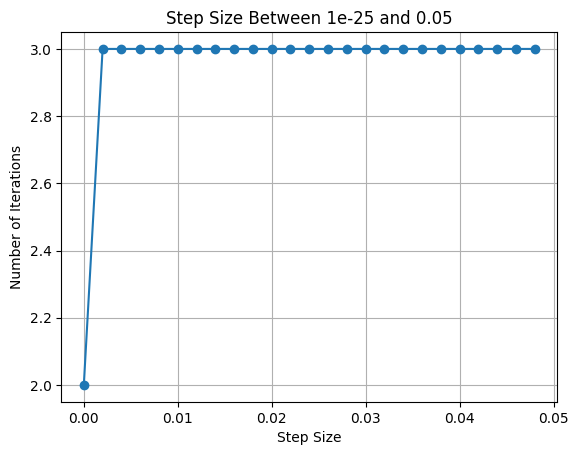

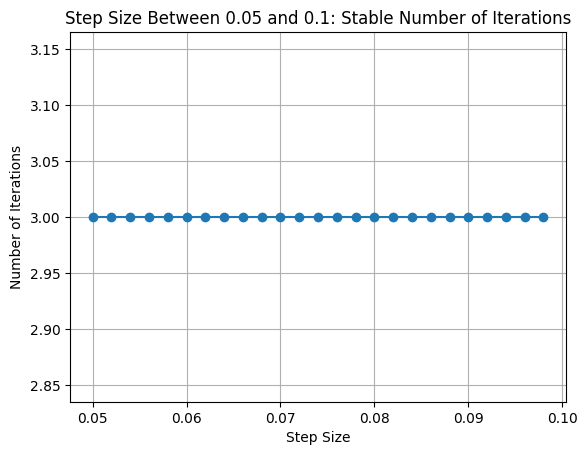

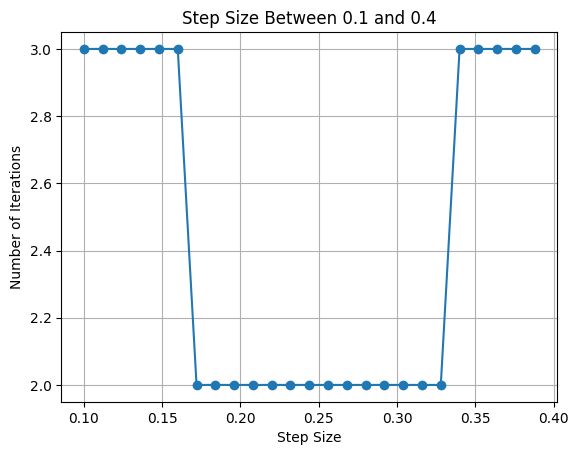

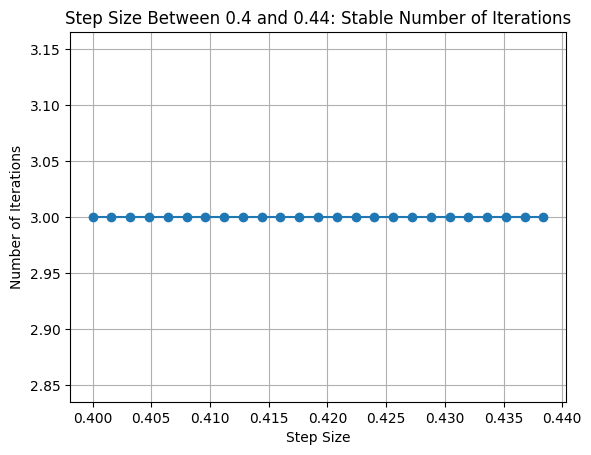

In [66]:
current_point = np.array([-2,-1,-1])
step_size = 0.1
epsilon = 10**(-5)
n = 25
x = np.linspace(1e-25, 0.05, num=n, endpoint=False)
number_of_iterations = [0]*n
i = 0
for step_size in x:
  result = gradient_projection(epsilon, current_point, step_size)
  number_of_iterations[i] = result[2]
  i += 1

plt.plot(x, number_of_iterations, marker='o', linestyle='-')
plt.xlabel('Step Size')
plt.ylabel('Number of Iterations')
plt.title('Step Size Between 1e-25 and 0.05')
plt.grid(True)
plt.show()

current_point = np.array([-2,-1,-1])
step_size = 0.1
epsilon = 10**(-5)
n = 25
x = np.linspace(0.05, 0.1, num=n, endpoint=False)
number_of_iterations = [0]*n
i = 0
for step_size in x:
  result = gradient_projection(epsilon, current_point, step_size)
  number_of_iterations[i] = result[2]
  i += 1

plt.plot(x, number_of_iterations, marker='o', linestyle='-')
plt.xlabel('Step Size')
plt.ylabel('Number of Iterations')
plt.title('Step Size Between 0.05 and 0.1: Stable Number of Iterations')
plt.grid(True)
plt.show()


current_point = np.array([-2,-1,-1])
step_size = 0.1
epsilon = 10**(-5)
n = 25
x = np.linspace(0.1, 0.4, num=n, endpoint=False)
number_of_iterations = [0]*n
i = 0
for step_size in x:
  result = gradient_projection(epsilon, current_point, step_size)
  number_of_iterations[i] = result[2]
  i += 1

plt.plot(x, number_of_iterations, marker='o', linestyle='-')
plt.xlabel('Step Size')
plt.ylabel('Number of Iterations')
plt.title('Step Size Between 0.1 and 0.4')
plt.grid(True)
plt.show()



current_point = np.array([-2,-1,-1])
step_size = 0.1
epsilon = 10**(-5)
n = 25
x = np.linspace(0.4, 0.44, num=n, endpoint=False)
number_of_iterations = [0]*n
i = 0
for step_size in x:
  result = gradient_projection(epsilon, current_point, step_size)
  number_of_iterations[i] = result[2]
  i += 1

plt.plot(x, number_of_iterations, marker='o', linestyle='-')
plt.xlabel('Step Size')
plt.ylabel('Number of Iterations')
plt.title('Step Size Between 0.4 and 0.44: Stable Number of Iterations')
plt.grid(True)
plt.show()